In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import linalg as la

import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [56]:
#building the dataset

N = 1001


x1 = np.random.normal(0 , 1 , N)
x2 = x1 + np.random.normal(0 , 3 , N)
x3 = 2*x1 + x2

dataset= pd.DataFrame([x1,x2,x3])

dataset

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,-1.383161,1.398225,2.078117,0.864501,0.859357,-0.131016,0.422942,-0.270396,-1.977366,-1.037430,...,-1.172533,0.953408,-0.169388,-0.942655,-0.164076,0.464664,-0.162883,2.600023,-1.951502,-0.582868
1,-5.643485,2.612191,1.034448,-1.602954,-1.962167,-2.183644,2.473239,-2.556167,-4.161266,1.221933,...,-2.656620,-0.986303,4.049162,-1.992222,-2.055037,-1.706773,2.647020,4.824978,-4.797541,1.954933
2,-8.409808,5.408641,5.190683,0.126049,-0.243454,-2.445677,3.319122,-3.096959,-8.115997,-0.852926,...,-5.001686,0.920513,3.710385,-3.877532,-2.383190,-0.777444,2.321254,10.025025,-8.700545,0.789197


In [62]:
#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

l, V = la.eig(np.cov(dataset))

print("Eighendecomposition\n")
print ("l = " ,  np.real_if_close(l) , '\n')
print ("V : \n" ,V)


#Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result

U, spectrum, _ = la.svd(dataset)

print("\n ----------------------------------------- \n \n SVD procedure")
print ("\nSpectrum = " , spectrum**2/(N-1),'\n')
print ("VSVD : \n ",U,'\n')


print("-------------- \nChecking the result")

print("\n Eighenvalues")
print ("\nl = " ,  np.sort(np.real_if_close(l)))
print ("S(SVD) = " , np.sort(spectrum**2/(N-1)),'\n')

print("\n Eighenvectors")
print ("\nV :\n " ,  V)
print ("\nV (SVD) :\n " , U,'\n')

print("The eighenvalues are slightly different for the two computational methods, especially for the smallest one")
print("The eighenvectors are not perfectly equal, but really similar.")

Eighendecomposition

l =  [ 2.77360192e+01 -7.09165334e-16  2.01793998e+00] 

V : 
 [[-0.12893417 -0.81649658  0.56276932]
 [-0.56031467 -0.40824829 -0.72068079]
 [-0.81818302  0.40824829  0.40485786]]

 ----------------------------------------- 
 
 SVD procedure

Spectrum =  [2.77478316e+01 2.01967914e+00 1.72533285e-30] 

VSVD : 
  [[-0.12903333  0.5627466  -0.81649658]
 [-0.56018768 -0.72077951 -0.40824829]
 [-0.81825434  0.40471368  0.40824829]] 

-------------- 
Checking the result

 Eighenvalues

l =  [-7.09165334e-16  2.01793998e+00  2.77360192e+01]
S(SVD) =  [1.72533285e-30 2.01967914e+00 2.77478316e+01] 


 Eighenvectors

V :
  [[-0.12893417 -0.81649658  0.56276932]
 [-0.56031467 -0.40824829 -0.72068079]
 [-0.81818302  0.40824829  0.40485786]]

V (SVD) :
  [[-0.12903333  0.5627466  -0.81649658]
 [-0.56018768 -0.72077951 -0.40824829]
 [-0.81825434  0.40471368  0.40824829]] 

The eighenvalues are slightly different for the two computational methods, especially for the smallest o

In [66]:
#What percent of the total dataset's variability is explained by the principal components?
#Given how the dataset was constructed, do these make sense?
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained.


Lambda = np.diag(np.real_if_close(l))


print(" Initlial dim p = 3 => new dim k = 1")
print ("\nPCA  k=1 (0):",abs(Lambda[0,0])/Lambda.trace(), "of the dataset's variability conserved")
print ("PCA  k=1 (1):",abs(Lambda[1,1])/Lambda.trace(), "of the dataset's variability conserved")
print ("PCA  k=1 (2):",abs(Lambda[2,2])/Lambda.trace(), "of the dataset's variability conserved")


print("\n \nInitlial dim p = 3 => new dim k = 2")
print ("\nPCA  k=2 (0):", abs(Lambda[0,0] + Lambda[1,1] )/Lambda.trace(), "of the dataset's variability conserved")
print ("PCA  k=2 (1):", abs(Lambda[0,0] + Lambda[2,2])/Lambda.trace(), "of the dataset's variability conserved")
print ("PCA  k=2 (2):", abs(Lambda[1,1] + Lambda[2,2])/Lambda.trace(), "of the dataset's variability conserved")


print("It makes sense, the first component conserves more variability")

 Initlial dim p = 3 => new dim k = 1

PCA  k=1 (0): 0.9321791104060755 of the total variability conserved
PCA  k=1 (1): 2.3834318322635217e-17 of the total variability conserved
PCA  k=1 (2): 0.06782088959392452 of the total variability conserved

 
Initlial dim p = 3 => new dim k = 2

PCA  k=2 (0): 0.9321791104060755 of the total variability conserved
PCA  k=2 (1): 1.0 of the total variability conserved
PCA  k=2 (2): 0.06782088959392449 of the total variability conserved


(-20.0, 20.0)

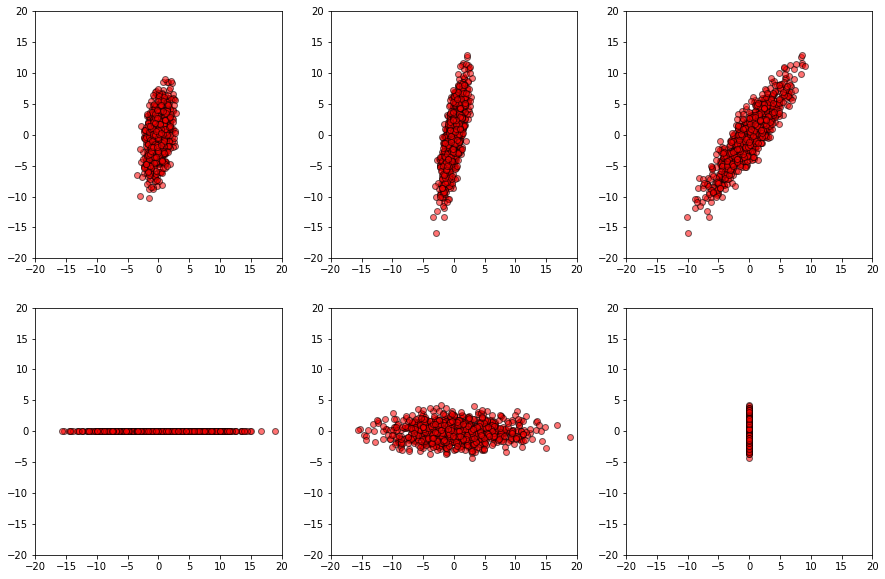

In [78]:
#Redefine the data in the basis yielded by the PCA procedure

new_data = pd.DataFrame(np.dot(V.T , dataset))

#Plot the data points in the original and the new coordiantes as a set of scatter plots. 
#Your final figure should have 2 rows of 3 plots each,
#where the columns show the (0,1), (0,2) and (1,2) proejctions.

fig , ((ax1,ax2,ax3) , (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

ax1.scatter(dataset.loc[0,:] , dataset.loc[1,:], alpha=0.55 , c='red', edgecolors='black')
ax1.set_xlim([-20,20])
ax1.set_ylim([-20,20])

ax2.scatter(dataset.loc[0,:] , dataset.loc[2,:], alpha=0.55, c='red', edgecolors='black')
ax2.set_xlim([-20,20])
ax2.set_ylim([-20,20])

ax3.scatter(dataset.loc[1,:] , dataset.loc[2,:], alpha=0.55, c='red', edgecolors='black')
ax3.set_xlim([-20,20])
ax3.set_ylim([-20,20])

ax4.scatter(new_data.loc[0,:] , new_data.loc[1,:], alpha=0.55, c='red', edgecolors='black')
ax4.set_xlim([-20,20])
ax4.set_ylim([-20,20])

ax5.scatter(new_data.loc[0,:] , new_data.loc[2,:], alpha=0.55, c='red', edgecolors='black')
ax5.set_xlim([-20,20])
ax5.set_ylim([-20,20])

ax6.scatter(new_data.loc[1,:] , new_data.loc[2,:], alpha=0.55, c='red', edgecolors='black')
ax6.set_xlim([-20,20])
ax6.set_ylim([-20,20])



2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [93]:
noise = []

for i in range(10):
    noise.append(np.random.normal(0, 1/53 , N))
       
data2 = dataset.append(noise, ignore_index=True)

data2


,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,-1.383161,1.398225,2.078117,0.864501,0.859357,-0.131016,0.422942,-0.270396,-1.977366,-1.037430,...,-1.172533,0.953408,-0.169388,-0.942655,-0.164076,0.464664,-0.162883,2.600023,-1.951502,-0.582868
1,-5.643485,2.612191,1.034448,-1.602954,-1.962167,-2.183644,2.473239,-2.556167,-4.161266,1.221933,...,-2.656620,-0.986303,4.049162,-1.992222,-2.055037,-1.706773,2.647020,4.824978,-4.797541,1.954933
2,-8.409808,5.408641,5.190683,0.126049,-0.243454,-2.445677,3.319122,-3.096959,-8.115997,-0.852926,...,-5.001686,0.920513,3.710385,-3.877532,-2.383190,-0.777444,2.321254,10.025025,-8.700545,0.789197
3,-0.005765,0.004937,-0.006151,0.001274,0.009248,0.032816,0.011464,0.005766,0.021495,-0.009874,...,-0.000449,-0.019545,0.009658,-0.025284,0.004825,0.041585,-0.016783,0.018063,-0.007629,0.014306
4,0.006164,-0.000242,0.027826,-0.003987,-0.004061,-0.015537,-0.021568,0.024918,-0.030533,0.016438,...,-0.007819,0.001425,-0.010729,-0.014928,0.011563,0.011566,0.041157,0.028072,-0.006270,0.000869
5,-0.003241,-0.025253,-0.003770,0.025039,-0.023962,-0.008989,0.004134,0.001272,0.013938,-0.004022,...,-0.058170,0.013101,0.000359,0.012221,0.019961,0.015888,-0.015016,0.021586,0.018183,0.002231
6,0.011157,0.005674,-0.024726,-0.018827,-0.009363,-0.020939,0.013607,-0.009497,-0.023617,0.005140,...,-0.012751,-0.001169,0.013303,-0.014734,0.002105,0.030451,-0.006888,-0.012958,0.002571,-0.034736
7,-0.004120,-0.011440,0.018890,-0.013241,0.002675,-0.031414,-0.020548,0.012936,0.001890,0.028111,...,0.008793,-0.015202,0.000973,-0.011776,-0.000161,0.029220,-0.052092,-0.026370,0.023835,0.045018
8,-0.018612,-0.011995,0.012445,-0.005523,-0.015918,-0.010247,0.007318,0.010374,0.009966,-0.017663,...,0.029775,-0.018899,0.029358,-0.014246,0.019734,-0.010329,0.037392,-0.014839,0.035366,-0.002569
9,0.003961,-0.029698,-0.041818,-0.003106,0.005153,-0.029295,0.034149,-0.010205,-0.001602,-0.015526,...,0.012206,-0.010898,0.064376,0.006967,-0.017679,0.010088,-0.023254,0.000839,-0.029431,-0.002361


In [102]:
l2, V2 = la.eig(np.cov(data2))

Lambda2 = np.diag(np.real_if_close(l2))

print("\nVariability conserved component by component: \n", np.real_if_close(l2)/np.trace(Lambda2))

print("\nThe two principal variables are the same as before.")
print("Variability of the noise is neglectable; being uncorrelated it has less meaning in the analysis")


Variability conserved component by component: 
 [ 9.32065057e-01  6.78126722e-02 -2.93169743e-17  1.50601606e-05
  1.36818237e-05  1.04299753e-05  1.07618146e-05  1.06813312e-05
  1.31809052e-05  1.27993599e-05  1.13976332e-05  1.23292350e-05
  1.19487332e-05]

The two principal variables are the same as before.
Variability of the noise is neglectable; being uncorrelated it has less meaning in the analysis


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P /home/ilazza/LaboratoryOfComputationalPhysics_Y4/dataEs7/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P /home/ilazza/LaboratoryOfComputationalPhysics_Y4/dataEs7/